In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import plotly.tools as tls
import plotly.plotly as py

crypto = pd.read_csv('crypto.csv', sep=',',engine = 'python')
crypto.head()

1.5e-05
0  0.000023
1  0.000033
2  0.000037
3  0.000037
4  0.000037

In [2]:
kripto = crypto['1.5e-05']
Min = kripto.min()
print("Minimum value = " + str(Min))

Max = kripto.max()
print("Maximum value = " + str(Max))

Mean = kripto.mean()
print("Mean value = " + str(Mean))

Mode = kripto.mode()[0]
print("Mode value = " + str(Mode))

Median = kripto.median()
print("Median value = " + str(Median))

Variance = kripto.var()
print("Variance value = " + str(Variance))

std = kripto.std()
print("Standard Deviation value = " + str(std))

skew = kripto.std()
print("Skewness value  = " + str(skew))

kur = kripto.kurtosis()
print("Kurtosis value = " + str(kur))

Minimum value = 2.9249999999999997e-09
Maximum value = 2383502.5
Mean value = 203.01846675673994
Mode value = 2e-06
Median value = 0.0097335
Variance value = 75320534.28415908
Standard Deviation value = 8678.740362757668
Skewness value  = 8678.740362757668
Kurtosis value = 22297.435590867655


Text(0.5, 1.0, 'Histogram')

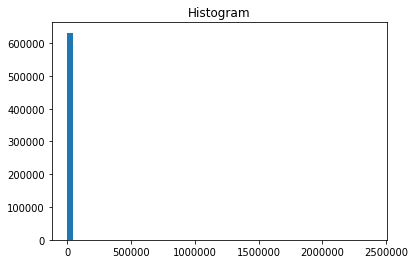

In [3]:
plt.hist(kripto,bins = 50)
plt.title('Histogram')

In [4]:
#Fungsi untuk menentukan distribusi yang cocok
import scipy.stats as st

def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,
        st.chisquare,
        st.beta,
        st.norm,
        st.uniform
    ]

    # Best holders
    best_distribution = st.gamma
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

print('Data ini menyerupai model distribusi')
print(best_fit_distribution(kripto))

Data ini menyerupai model distribusi
('gamma', (0.0, 1.0))


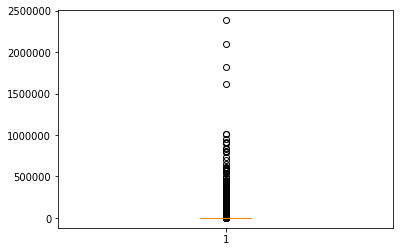

In [5]:
plt.boxplot(kripto)
plt.show()

In [6]:
def Ekspektasi(n_samples, data, bound, sign):
    count = 0
    if(sign == '<'):
        for item in data:
            if item < bound:
                count = count + 1
    else:
        for item in data:
            if item > bound:
                count = count + 1
    return n_samples*count/len(data)

print('Apabila hari ini terdapat 1000 data harga cryptocurrency baru,tentukan ekspektasi jumlah cryptocurrency yang nilainya')
print('i. kurang dari 0.177013')
print(Ekspektasi(1000, kripto, 0.177013, '<'))
print('ii. lebih dari 177.013')
print(Ekspektasi(1000, kripto, 177.013, '>'))

Apabila hari ini terdapat 1000 data harga cryptocurrency baru,tentukan ekspektasi jumlah cryptocurrency yang nilainya
i. kurang dari 0.177013
780.3333349150687
ii. lebih dari 177.013
10.804834416031204


In [7]:
print('Jika suatu hari terdapat sebuah cryptocurrency baru,tentukan peluang cryptocurrency tersebut bernilai')
print('i. lebih dari 0.013')
print(Ekspektasi(1, kripto, 0.013, '>'))
print('ii. kurang dari 17.7')
print(Ekspektasi(1, kripto, 17.7, '<'))

Jika suatu hari terdapat sebuah cryptocurrency baru,tentukan peluang cryptocurrency tersebut bernilai
i. lebih dari 0.013
0.46514092471414087
ii. kurang dari 17.7
0.9726343961013386
